# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Шаг 1. Открыл файл с данными и изучил общую информацию

### ЗВОНКИ

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd
df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls.sample(15))

,id,call_date,duration,user_id
68370,1173_103,2018-12-11,3.99,1173
135195,1345_4,2018-06-21,5.57,1345
173228,1427_592,2018-11-05,2.16,1427
189310,1466_325,2018-10-24,1.55,1466
193494,1475_163,2018-07-28,0.00,1475
510,1002_20,2018-11-07,2.94,1002
184671,1457_643,2018-05-12,3.31,1457
71940,1179_212,2018-11-07,16.87,1179
11305,1029_194,2018-12-23,0.00,1029
191645,1471_448,2018-09-03,9.80,1471


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
 pd.DataFrame(round((df_calls.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
id,0
call_date,0
duration,0
user_id,0


In [5]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


### ИНТЕРНЕТ

In [6]:
import pandas as pd
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
display(df_internet.sample(15))

,id,mb_used,session_date,user_id
95378,1322_79,262.72,2018-12-25,1322
4167,1012_440,519.57,2018-07-09,1012
148160,1496_108,445.96,2018-06-16,1496
114368,1385_576,685.93,2018-05-22,1385
2308,1007_432,477.09,2018-06-06,1007
5460,1015_468,146.38,2018-05-04,1015
149280,1499_41,249.20,2018-10-19,1499
108771,1372_139,0.00,2018-05-20,1372
37430,1130_328,207.38,2018-12-17,1130
126853,1425_382,131.08,2018-06-26,1425


In [7]:
df_internet.duplicated().sum()

0

In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
pd.DataFrame(round((df_internet.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
id,0
mb_used,0
session_date,0
user_id,0


### СООБЩЕНИЯ

In [10]:
import pandas as pd
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages.sample(15))

,id,message_date,user_id
119836,1484_357,2018-08-10,1484
56924,1251_388,2018-07-09,1251
97180,1396_831,2018-07-05,1396
99880,1409_181,2018-04-01,1409
36389,1158_194,2018-02-07,1158
21077,1089_1080,2018-09-03,1089
96041,1395_28,2018-11-30,1395
94381,1385_1090,2018-05-03,1385
115224,1471_452,2018-11-29,1471
60409,1266_17,2018-10-12,1266


In [11]:
df_messages.duplicated().sum()

0

In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
 pd.DataFrame(round((df_messages.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
id,0
message_date,0
user_id,0


### ТАРИФЫ

In [14]:
import pandas as pd
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [15]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
 pd.DataFrame(round((df_tariffs.isna().mean()*100),2)).style.background_gradient('coolwarm') 

,0
messages_included,0
mb_per_month_included,0
minutes_included,0
rub_monthly_fee,0
rub_per_gb,0
rub_per_message,0
rub_per_minute,0
tariff_name,0


In [17]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [18]:
df_tariffs.duplicated().sum()

0

### ПОЛЬЗОВАТЕЛИ

In [19]:
import pandas as pd
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.sample(15))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
411,1411,36,NaN,Грозный,Берта,Прокофьева,2018-07-13,smart
304,1304,68,NaN,Владимир,Илья,Соловьёв,2018-11-05,ultra
140,1140,22,NaN,Киров,Леонид,Ахматулин,2018-12-31,smart
427,1427,24,NaN,Казань,Ириней,Азаров,2018-04-03,smart
347,1347,29,NaN,Москва,Лола,Фокина,2018-11-01,ultra
392,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra
244,1244,68,NaN,Москва,Геральд,Макеев,2018-05-09,smart
251,1251,48,NaN,Пермь,Роксана,Тетерина,2018-02-13,smart
342,1342,20,NaN,Новосибирск,Валентина,Казакова,2018-10-18,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra


In [20]:
df_users.duplicated().sum()

0

In [21]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [22]:
 pd.DataFrame(round((df_users.isna().mean()*100),2)).style.background_gradient('coolwarm') 

,0
user_id,0
age,0
churn_date,92.4
city,0
first_name,0
last_name,0
reg_date,0
tariff,0


<div class="alert alert-info">
    <h3> Комментарий </h3>
   В данном разделе изучил 4 датасета, для понимания с чем предстоит работать. Обнаружил, что пропуски и дубликаты в них отсутствуют. В некоторых таблицах тип и формат данных предстоит поменять. 

## Шаг 2. Подготовил данные

### Привёл данные к нужным типам

#### ЗВОНКИ

In [23]:
import numpy as np
import math
df_calls ['duration'] = np.ceil(df_calls['duration']).astype(int)
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [24]:
df_calls['call_date']=pd.to_datetime(
    df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S' # изменил формат столбца call_date на datetime64
)
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


#### ИНТЕРНЕТ

In [25]:
df_internet['session_date']=pd.to_datetime(
    df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S' # изменил формат столбца session_date на datetime64
)

df_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [26]:
df_internet['mb_used'] = np.ceil(df_internet.mb_used).astype(int)
df_internet

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,0,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


#### СООБЩЕНИЯ

In [27]:
df_messages['message_date']=pd.to_datetime(
    df_messages['message_date'], format='%Y-%m-%dT%H:%M:%S' # изменил формат столбца message_date на datetime64
)
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


#### ПОЛЬЗОВАТЕЛИ

In [28]:
df_users['reg_date']=pd.to_datetime(
    df_users['reg_date'], format='%Y-%m-%dT%H:%M:%S'
)# изменил формат столбца reg_date на datetime64
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [29]:
df_users ['churn_date'] = df_users ['churn_date'].astype('bool')
df_users['churn_date'].value_counts()
df_users['churn_date'] = df_users['churn_date'].fillna(0)
df_users ['churn_date'] = df_users ['churn_date'].astype('int')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null int64
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 31.4+ KB


<div class="alert alert-info">
    <h4>Комментарий </h4>
   В данном разделе заменил Nan-ы на нули в тех, столбцах, где они присутствовали. Изменил форматы дат в датасетах и привел некоторые значения к int 

### Нашёл и исправил ошибки в данных, которые обнаружил.

In [30]:
df_users = df_users.loc[df_users.ne(0).all(axis=1)]
df_internet = df_internet.loc[df_internet.ne(0).all(axis=1)]

In [31]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


<div class="alert alert-info">
<font size="5"><b>Комментарий</b></font>

В звонках нули отображены входящими звонками, извини за тавтологию. Ну а в интернете сорее всего это сбой сети, либо некорректная выгрузка в данную таблицу. Удалять в звонках будет не совсем верно, а вот в интернете удалить нули нужно.

</div>

### Посчитал для каждого пользователя:
#### количество сделанных звонков и израсходованных минут разговора по месяцам;


In [32]:
df_calls['mounth_exposition'] = df_calls['call_date'].apply(lambda x: x.strftime('%B'))
df_calls.groupby('user_id')['mounth_exposition'].value_counts()


user_id  mounth_exposition
1000     September            58
         October              57
         August               52
         July                 47
         December             46
                              ..
1498     July                 23
1499     November             74
         December             69
         October              68
         September             9
Name: mounth_exposition, Length: 3174, dtype: int64

In [33]:
df_calls=df_calls.query('duration !=0').groupby(['user_id', 'mounth_exposition'], as_index = False)[['duration']].sum()

df_calls

,user_id,mounth_exposition,duration
0,1000,August,408
1,1000,December,333
2,1000,July,340
3,1000,June,172
4,1000,May,159
...,...,...,...
3163,1498,September,471
3164,1499,December,492
3165,1499,November,612
3166,1499,October,449


#### количество отправленных сообщений по месяцам;


In [34]:
df_messages['mounth_exposition'] = df_messages['message_date'].apply(lambda x: x.strftime('%B'))

df_messages['count'] = 1

df_messages = df_messages.groupby(['user_id','mounth_exposition'], as_index = False)['count'].sum()
df_messages

,user_id,mounth_exposition,count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
...,...,...,...
2712,1498,September,44
2713,1499,December,66
2714,1499,November,59
2715,1499,October,48


#### объем израсходованного интернет-трафика по месяцам;


In [35]:
pd.set_option('chained_assignment', None) 

In [36]:

df_internet['mounth_exposition'] = df_internet['session_date'].apply(lambda x: x.strftime('%B'))
df_internet = df_internet.groupby(['user_id','mounth_exposition'], as_index = False)[['mb_used']].sum()

df_internet

,user_id,mounth_exposition,mb_used
0,1000,August,14070
1,1000,December,9827
2,1000,July,14016
3,1000,June,23257
4,1000,May,2256
...,...,...,...
3196,1498,September,22166
3197,1499,December,13077
3198,1499,November,17984
3199,1499,October,17809


In [37]:
df_internet ['gb_used'] = df_internet['mb_used'] /1000
df_internet ['gb_used'] = np.ceil(df_internet ['gb_used']).astype(int)
df_internet

,user_id,mounth_exposition,mb_used,gb_used
0,1000,August,14070,15
1,1000,December,9827,10
2,1000,July,14016,15
3,1000,June,23257,24
4,1000,May,2256,3
...,...,...,...,...
3196,1498,September,22166,23
3197,1499,December,13077,14
3198,1499,November,17984,18
3199,1499,October,17809,18


<div class="alert alert-info">
    <h4>Комментарий</h4>
   Создал таблицы для понимания сколько,кто и в каком месяце расходовал интернет, звонки и смс

### помесячную выручку с каждого пользователя (вычел бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножил на значение из тарифного плана; прибавил абонентскую плату, соответствующую тарифному плану).

#### Расчёт ВЫРУЧКИ по ЗВОНКАМ

In [38]:
df_users_calls1=df_calls.merge(df_users, on='user_id', how='inner') 

df_users_calls1

,user_id,mounth_exposition,duration,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,408,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,333,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,340,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,172,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,159,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3163,1498,September,471,68,1,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3164,1499,December,492,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart
3165,1499,November,612,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart
3166,1499,October,449,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart


In [39]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [40]:
df_users_calls1 = df_users_calls1.merge(df_tariffs, on='tariff', how='outer')
df_users_calls1

,user_id,mounth_exposition,duration,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,408,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,333,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,340,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,172,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,159,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,1498,September,471,68,1,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3164,1499,December,492,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3165,1499,November,612,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3166,1499,October,449,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


In [41]:
df_users_calls_sum_duration = df_users_calls1.pivot_table(index = ['user_id', 'mounth_exposition', 'tariff', 'city'], values =['duration','rub_per_minute','minutes_included', 'rub_monthly_fee'], aggfunc = 'sum')
df_users_calls_sum_duration

duration  minutes_included  \
user_id mounth_exposition tariff city                                      
1000    August            ultra  Краснодар         408              3000   
        December          ultra  Краснодар         333              3000   
        July              ultra  Краснодар         340              3000   
        June              ultra  Краснодар         172              3000   
        May               ultra  Краснодар         159              3000   
...                                                ...               ...   
1498    September         smart  Владикавказ       471               500   
1499    December          smart  Пермь             492               500   
        November          smart  Пермь             612               500   
        October           smart  Пермь             449               500   
        September         smart  Пермь              70               500   

                                              rub_monthly_fee  rub_per_minute  
user_id mounth_exposition tariff city                                          
1000    August            ultra  Краснодар               1950               1  
        December          ultra  Краснодар               1950               1  
        July              ultra  Краснодар               1950               1  
        June              ultra  Краснодар               1950               1  
        May               ultra  Краснодар               1950               1  
...                                                       ...             ...  
1498    September         smart  Владикавказ              550               3  
1499    December          smart  Пермь                    550               3  
        November          smart  Пермь                    550               3  
        October           smart  Пермь                    550               3  
        September         smart  Пермь                    550               3  

[3168 rows x 4 columns]

In [42]:
df_users_calls_sum_duration['more_limit'] = df_users_calls_sum_duration['duration'] - df_users_calls_sum_duration['minutes_included']
df_users_calls_sum_duration['more_limit'] = df_users_calls_sum_duration['more_limit'].where(df_users_calls_sum_duration['more_limit'] > 0, 0)
df_users_calls_sum_duration['profit_calls'] = df_users_calls_sum_duration['more_limit'] * df_users_calls_sum_duration['rub_per_minute'] 
df_users_calls_sum_duration

duration  minutes_included  \
user_id mounth_exposition tariff city                                      
1000    August            ultra  Краснодар         408              3000   
        December          ultra  Краснодар         333              3000   
        July              ultra  Краснодар         340              3000   
        June              ultra  Краснодар         172              3000   
        May               ultra  Краснодар         159              3000   
...                                                ...               ...   
1498    September         smart  Владикавказ       471               500   
1499    December          smart  Пермь             492               500   
        November          smart  Пермь             612               500   
        October           smart  Пермь             449               500   
        September         smart  Пермь              70               500   

                                              rub_monthly_fee  rub_per_minute  \
user_id mounth_exposition tariff city                                           
1000    August            ultra  Краснодар               1950               1   
        December          ultra  Краснодар               1950               1   
        July              ultra  Краснодар               1950               1   
        June              ultra  Краснодар               1950               1   
        May               ultra  Краснодар               1950               1   
...                                                       ...             ...   
1498    September         smart  Владикавказ              550               3   
1499    December          smart  Пермь                    550               3   
        November          smart  Пермь                    550               3   
        October           smart  Пермь                    550               3   
        September         smart  Пермь                    550               3   

                                              more_limit  profit_calls  
user_id mounth_exposition tariff city                                   
1000    August            ultra  Краснодар             0             0  
        December          ultra  Краснодар             0             0  
        July              ultra  Краснодар             0             0  
        June              ultra  Краснодар             0             0  
        May               ultra  Краснодар             0             0  
...                                                  ...           ...  
1498    September         smart  Владикавказ           0             0  
1499    December          smart  Пермь                 0             0  
        November          smart  Пермь               112           336  
        October           smart  Пермь                 0             0  
        September         smart  Пермь                 0             0  

[3168 rows x 6 columns]

In [43]:
df_users_calls_sum_duration['profit_calls'].sum()

278217

#### Расчёт для ВЫРУЧКИ по СООБЩЕНИЯМ

In [44]:
df_users_messages1_1=df_users.merge(df_messages, on='user_id', how='inner') 

df_users_messages1_1


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mounth_exposition,count
0,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,August,81
1,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,December,70
2,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,July,75
3,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,June,60
4,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,22
...,...,...,...,...,...,...,...,...,...,...
2712,1498,68,1,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,September,44
2713,1499,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,December,66
2714,1499,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,November,59
2715,1499,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,October,48


In [45]:
df_users_messages1 = df_users_messages1_1.merge(df_tariffs, on='tariff', how='outer')
df_users_messages1

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mounth_exposition,count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,August,81,1000,30720,3000,1950,150,1,1
1,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,December,70,1000,30720,3000,1950,150,1,1
2,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,July,75,1000,30720,3000,1950,150,1,1
3,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,June,60,1000,30720,3000,1950,150,1,1
4,1000,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,22,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,1498,68,1,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,September,44,50,15360,500,550,200,3,3
2713,1499,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,December,66,50,15360,500,550,200,3,3
2714,1499,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,November,59,50,15360,500,550,200,3,3
2715,1499,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,October,48,50,15360,500,550,200,3,3


In [46]:
df_users_messages_sum = df_users_messages1.pivot_table(index = ['user_id', 'mounth_exposition', 'tariff','city'], values =['count', 'messages_included', 'rub_per_message', 'rub_monthly_fee'], aggfunc = 'sum')
df_users_messages_sum

count  messages_included  \
user_id mounth_exposition tariff city                                    
1000    August            ultra  Краснодар       81               1000   
        December          ultra  Краснодар       70               1000   
        July              ultra  Краснодар       75               1000   
        June              ultra  Краснодар       60               1000   
        May               ultra  Краснодар       22               1000   
...                                             ...                ...   
1498    September         smart  Владикавказ     44                 50   
1499    December          smart  Пермь           66                 50   
        November          smart  Пермь           59                 50   
        October           smart  Пермь           48                 50   
        September         smart  Пермь           11                 50   

                                              rub_monthly_fee  rub_per_message  
user_id mounth_exposition tariff city                                           
1000    August            ultra  Краснодар               1950                1  
        December          ultra  Краснодар               1950                1  
        July              ultra  Краснодар               1950                1  
        June              ultra  Краснодар               1950                1  
        May               ultra  Краснодар               1950                1  
...                                                       ...              ...  
1498    September         smart  Владикавказ              550                3  
1499    December          smart  Пермь                    550                3  
        November          smart  Пермь                    550                3  
        October           smart  Пермь                    550                3  
        September         smart  Пермь                    550                3  

[2717 rows x 4 columns]

In [47]:
df_users_messages_sum['more_limit'] = df_users_messages_sum['count'] - df_users_messages_sum['messages_included']
df_users_messages_sum['more_limit'] = df_users_messages_sum['more_limit'].where(df_users_messages_sum['more_limit'] > 0, 0)
df_users_messages_sum['profit_messages'] = df_users_messages_sum['more_limit'] * df_users_messages_sum['rub_per_message']
df_users_messages_sum

count  messages_included  \
user_id mounth_exposition tariff city                                    
1000    August            ultra  Краснодар       81               1000   
        December          ultra  Краснодар       70               1000   
        July              ultra  Краснодар       75               1000   
        June              ultra  Краснодар       60               1000   
        May               ultra  Краснодар       22               1000   
...                                             ...                ...   
1498    September         smart  Владикавказ     44                 50   
1499    December          smart  Пермь           66                 50   
        November          smart  Пермь           59                 50   
        October           smart  Пермь           48                 50   
        September         smart  Пермь           11                 50   

                                              rub_monthly_fee  \
user_id mounth_exposition tariff city                           
1000    August            ultra  Краснодар               1950   
        December          ultra  Краснодар               1950   
        July              ultra  Краснодар               1950   
        June              ultra  Краснодар               1950   
        May               ultra  Краснодар               1950   
...                                                       ...   
1498    September         smart  Владикавказ              550   
1499    December          smart  Пермь                    550   
        November          smart  Пермь                    550   
        October           smart  Пермь                    550   
        September         smart  Пермь                    550   

                                              rub_per_message  more_limit  \
user_id mounth_exposition tariff city                                       
1000    August            ultra  Краснодар                  1           0   
        December          ultra  Краснодар                  1           0   
        July              ultra  Краснодар                  1           0   
        June              ultra  Краснодар                  1           0   
        May               ultra  Краснодар                  1           0   
...                                                       ...         ...   
1498    September         smart  Владикавказ                3           0   
1499    December          smart  Пермь                      3          16   
        November          smart  Пермь                      3           9   
        October           smart  Пермь                      3           0   
        September         smart  Пермь                      3           0   

                                              profit_messages  
user_id mounth_exposition tariff city                          
1000    August            ultra  Краснодар                  0  
        December          ultra  Краснодар                  0  
        July              ultra  Краснодар                  0  
        June              ultra  Краснодар                  0  
        May               ultra  Краснодар                  0  
...                                                       ...  
1498    September         smart  Владикавказ                0  
1499    December          smart  Пермь                     48  
        November          smart  Пермь                     27  
        October           smart  Пермь                      0  
        September         smart  Пермь                      0  

[2717 rows x 6 columns]

In [48]:
df_users_messages_sum['profit_messages'].sum()

38784

#### Расчёт для ВЫРУЧКИ по ИНТЕРНЕТУ

In [49]:
df_users_internet1=df_internet.merge(df_users, on='user_id', how='inner') 

df_users_internet1

,user_id,mounth_exposition,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,14070,15,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,9827,10,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,14016,15,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,23257,24,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,2256,3,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...
3196,1498,September,22166,23,68,1,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3197,1499,December,13077,14,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart
3198,1499,November,17984,18,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart
3199,1499,October,17809,18,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart


In [50]:
df_users_internet1 = df_users_internet1.merge(df_tariffs, on='tariff', how='outer')
df_users_internet1

,user_id,mounth_exposition,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,14070,15,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,9827,10,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,14016,15,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,23257,24,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,2256,3,52,1,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,1498,September,22166,23,68,1,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3197,1499,December,13077,14,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3198,1499,November,17984,18,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3199,1499,October,17809,18,35,1,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


In [51]:
df_users_internet1['gb_per_month_included'] = df_users_internet1['mb_per_month_included'] / 1000
df_users_internet1['gb_per_month_included'] = np.ceil(df_users_internet1 ['gb_per_month_included']).astype(int)
df_users_internet1_sum = df_users_internet1.pivot_table(index = ['user_id', 'mounth_exposition', 'tariff','city'], values =['gb_used',  'gb_per_month_included', 'rub_monthly_fee', 'rub_per_gb'], aggfunc = 'sum')
df_users_internet1_sum

gb_per_month_included  gb_used  \
user_id mounth_exposition tariff city                                          
1000    August            ultra  Краснодар                       31       15   
        December          ultra  Краснодар                       31       10   
        July              ultra  Краснодар                       31       15   
        June              ultra  Краснодар                       31       24   
        May               ultra  Краснодар                       31        3   
...                                                             ...      ...   
1498    September         smart  Владикавказ                     16       23   
1499    December          smart  Пермь                           16       14   
        November          smart  Пермь                           16       18   
        October           smart  Пермь                           16       18   
        September         smart  Пермь                           16        2   

                                              rub_monthly_fee  rub_per_gb  
user_id mounth_exposition tariff city                                      
1000    August            ultra  Краснодар               1950         150  
        December          ultra  Краснодар               1950         150  
        July              ultra  Краснодар               1950         150  
        June              ultra  Краснодар               1950         150  
        May               ultra  Краснодар               1950         150  
...                                                       ...         ...  
1498    September         smart  Владикавказ              550         200  
1499    December          smart  Пермь                    550         200  
        November          smart  Пермь                    550         200  
        October           smart  Пермь                    550         200  
        September         smart  Пермь                    550         200  

[3201 rows x 4 columns]

In [52]:
df_users_internet1_sum['more_limit'] = df_users_internet1_sum['gb_used'] - df_users_internet1_sum['gb_per_month_included']
df_users_internet1_sum['more_limit'] = df_users_internet1_sum['more_limit'].where(df_users_internet1_sum['more_limit'] > 0,0)
df_users_internet1_sum['profit_internet'] = df_users_internet1_sum['more_limit'] * df_users_internet1_sum['rub_per_gb'] 
df_users_internet1_sum['total_internet_profit'] = df_users_internet1_sum['profit_internet'] + df_users_internet1_sum['rub_monthly_fee']
df_users_internet1_sum

gb_per_month_included  gb_used  \
user_id mounth_exposition tariff city                                          
1000    August            ultra  Краснодар                       31       15   
        December          ultra  Краснодар                       31       10   
        July              ultra  Краснодар                       31       15   
        June              ultra  Краснодар                       31       24   
        May               ultra  Краснодар                       31        3   
...                                                             ...      ...   
1498    September         smart  Владикавказ                     16       23   
1499    December          smart  Пермь                           16       14   
        November          smart  Пермь                           16       18   
        October           smart  Пермь                           16       18   
        September         smart  Пермь                           16        2   

                                              rub_monthly_fee  rub_per_gb  \
user_id mounth_exposition tariff city                                       
1000    August            ultra  Краснодар               1950         150   
        December          ultra  Краснодар               1950         150   
        July              ultra  Краснодар               1950         150   
        June              ultra  Краснодар               1950         150   
        May               ultra  Краснодар               1950         150   
...                                                       ...         ...   
1498    September         smart  Владикавказ              550         200   
1499    December          smart  Пермь                    550         200   
        November          smart  Пермь                    550         200   
        October           smart  Пермь                    550         200   
        September         smart  Пермь                    550         200   

                                              more_limit  profit_internet  \
user_id mounth_exposition tariff city                                       
1000    August            ultra  Краснодар             0                0   
        December          ultra  Краснодар             0                0   
        July              ultra  Краснодар             0                0   
        June              ultra  Краснодар             0                0   
        May               ultra  Краснодар             0                0   
...                                                  ...              ...   
1498    September         smart  Владикавказ           7             1400   
1499    December          smart  Пермь                 0                0   
        November          smart  Пермь                 2              400   
        October           smart  Пермь                 2              400   
        September         smart  Пермь                 0                0   

                                              total_internet_profit  
user_id mounth_exposition tariff city                                
1000    August            ultra  Краснодар                     1950  
        December          ultra  Краснодар                     1950  
        July              ultra  Краснодар                     1950  
        June              ultra  Краснодар                     1950  
        May               ultra  Краснодар                     1950  
...                                                             ...  
1498    September         smart  Владикавказ                   1950  
1499    December          smart  Пермь                          550  
        November          smart  Пермь                          950  
        October           smart  Пермь                          950  
        September         smart  Пермь                          550  

[3201 rows x 7 columns]

In [53]:
df_users_internet1_sum['profit_internet'].sum()

1312800

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>
 
Больше всего прибыли приносит оператору интернет

In [54]:
df_users_internet1_sum['total_internet_profit'].sum()

4436950

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>

 В этой таблице добавил еще столбец с абонентской платой в месяц и выручкой с интернета. Таким образом для дальнейшего расчёта абонентскую плату посчитаем только один раз.

</div>

#### ОБЩАЯ ВЫРУЧКА

In [56]:
df_users_internet1_sum = df_users_internet1_sum.reset_index()
df_users_messages_sum = df_users_messages_sum.reset_index()
df_users_calls_sum_duration = df_users_calls_sum_duration.reset_index()
df_users_calls_sum_duration1 = df_users_calls_sum_duration.merge(df_users_messages_sum[['index','profit_messages']], on='index', how = 'outer')

In [74]:
df_users_calls_sum_duration1 = df_users_calls_sum_duration1.fillna(0)
df_users_calls_sum_duration1

,index,user_id,mounth_exposition,tariff,city,duration,minutes_included,rub_monthly_fee,rub_per_minute,more_limit,profit_calls,profit_messages
0,0,1000,August,ultra,Краснодар,408,3000,1950,1,0,0,0.0
1,1,1000,December,ultra,Краснодар,333,3000,1950,1,0,0,0.0
2,2,1000,July,ultra,Краснодар,340,3000,1950,1,0,0,0.0
3,3,1000,June,ultra,Краснодар,172,3000,1950,1,0,0,0.0
4,4,1000,May,ultra,Краснодар,159,3000,1950,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3163,3163,1498,September,smart,Владикавказ,471,500,550,3,0,0,0.0
3164,3164,1499,December,smart,Пермь,492,500,550,3,0,0,0.0
3165,3165,1499,November,smart,Пермь,612,500,550,3,112,336,0.0
3166,3166,1499,October,smart,Пермь,449,500,550,3,0,0,0.0


<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>

    
Здесь я решил cмерджить таблицы по индексам. Для этого я их вывел в отдельный столбец

</div>

In [75]:
df_users_calls_sum_duration2 = df_users_calls_sum_duration1.merge(df_users_internet1_sum[['index','total_internet_profit']], on='index',  how = 'outer')

df_users_calls_sum_duration2

,index,user_id,mounth_exposition,tariff,city,duration,minutes_included,rub_monthly_fee,rub_per_minute,more_limit,profit_calls,profit_messages,total_internet_profit
0,0,1000.0,August,ultra,Краснодар,408.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950
1,1,1000.0,December,ultra,Краснодар,333.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950
2,2,1000.0,July,ultra,Краснодар,340.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950
3,3,1000.0,June,ultra,Краснодар,172.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950
4,4,1000.0,May,ultra,Краснодар,159.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950
3197,3197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
3198,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950
3199,3199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950


In [76]:
df_users_calls_sum_duration2['total_profit'] = df_users_calls_sum_duration2['profit_calls'] + df_users_calls_sum_duration2['total_internet_profit'] + df_users_calls_sum_duration2['profit_messages']
df_users_calls_sum_duration2['total_profit'].sum()

4700351.0

<div class="alert alert-info">
    <h4>Комментарий</h4>
   Посчитал общую выручку для компании, а также выручку отдельно по совершенным звонкам, смс и интернету

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>

Добавил месячную абонентскую плату в расчёты по операциям. На данный момент считает корректно.

</div>

## Шаг 3. Проанализировал данные

### Описал поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитал среднее количество, дисперсию и стандартное отклонение. Построил гистограммы. Описал распределения.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.rcParams['figure.figsize'] = (10, 5)

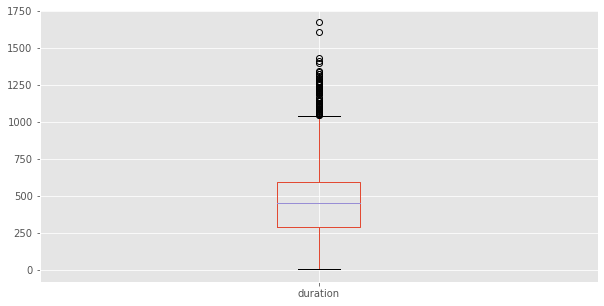

In [78]:
plt.ylim()
df_users_calls_sum_duration.boxplot('duration')

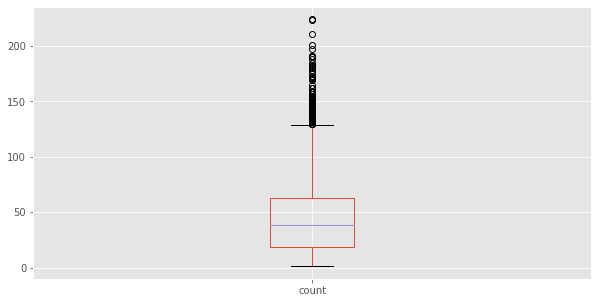

In [79]:
plt.ylim()
df_users_messages_sum.boxplot('count')

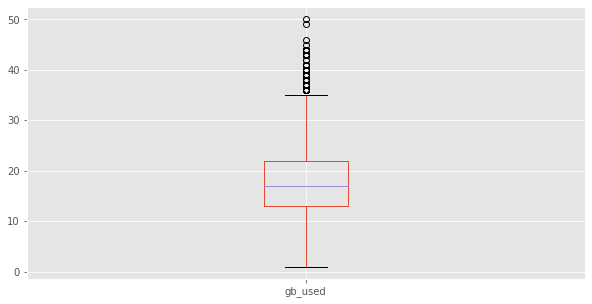

In [80]:
plt.ylim()
df_users_internet1_sum.boxplot('gb_used')

In [81]:
import numpy as np 
x = df_users_internet1_sum['gb_used']
variance = np.var(x)
standard_deviation = np.std(x)
print(variance)
print(standard_deviation)

56.567921751256854
7.521164919828368


In [82]:
import numpy as np 
x = df_users_messages_sum['count'] 
variance = np.var(x)
standard_deviation = np.std(x)
print(variance) 
print(standard_deviation)

1228.1458278273265
35.04491158252973


In [83]:
import numpy as np 
x = df_users_calls_sum_duration['duration'] 
variance = np.var(x)
standard_deviation = np.std(x)
print(variance) 
print(standard_deviation)

56352.131468468615
237.3860389080803


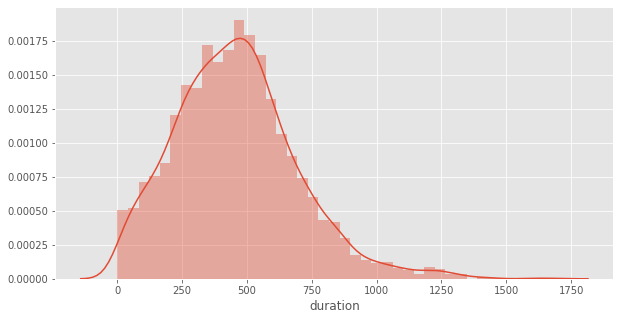

In [84]:
sns_plot = sns.distplot(df_users_calls_sum_duration['duration'])
fig = sns_plot.get_figure()
sns_plot

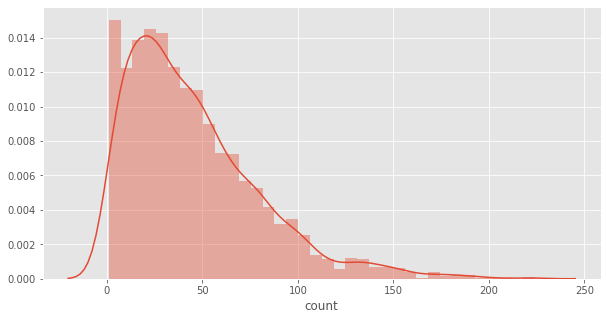

In [85]:
sns_plot = sns.distplot(df_users_messages_sum['count'])
fig = sns_plot.get_figure()
sns_plot

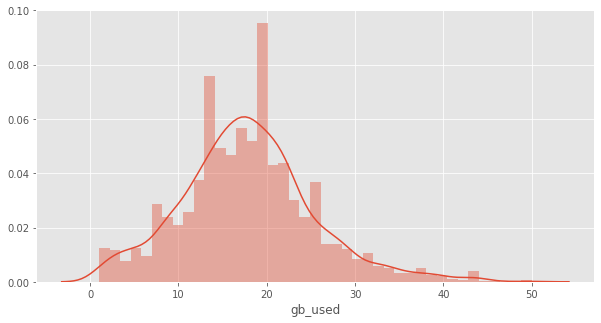

In [86]:
sns_plot = sns.distplot(df_users_internet1_sum['gb_used'])
fig = sns_plot.get_figure()
sns_plot

<div class="alert alert-info">
    <h3>Комментарий</h3>
   В данном разделе построил гистограммы и ящики с усами по раздельным таблицам и обнаружил, что существуют выбросы. Так же обнаружил, что датасеты по данным имеют скошенность вправо, а стандартные отклонения имеют большие показатели. Пользователей тарифа Смарт больше, чем Ультра и прибыль они приносят большую

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>

Проработал с итоговой таблицей. На графике видно, что в основном используется большое количество интернет траффика. Наибольшую прибыль нам принёс тариф Смарт в январе

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>

"Средний пользователь" посчитан и теперь виден. Судя по гистограммам и ящикам с усами видно, что он тратит 18гб траффика интернета, раазговаривает примерно по  450 - 500 минут и тратит 30-35смс в месяц   


</div>

## Шаг 4. Проверил гипотезы

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

In [87]:
df_total_tariff_ultra = df_users_calls_sum_duration2.loc[df_users_calls_sum_duration2['tariff'] == 'ultra']
df_total_tariff_ultra['total_profit'] = df_total_tariff_ultra['total_profit'].fillna(0)
df_total_tariff_ultra

,index,user_id,mounth_exposition,tariff,city,duration,minutes_included,rub_monthly_fee,rub_per_minute,more_limit,profit_calls,profit_messages,total_internet_profit,total_profit
0,0,1000.0,August,ultra,Краснодар,408.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
1,1,1000.0,December,ultra,Краснодар,333.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
2,2,1000.0,July,ultra,Краснодар,340.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
3,3,1000.0,June,ultra,Краснодар,172.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
4,4,1000.0,May,ultra,Краснодар,159.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,3140,1495.0,August,ultra,Иркутск,92.0,3000.0,1950.0,1.0,0.0,0.0,0.0,950,950.0
3141,3141,1495.0,December,ultra,Иркутск,1031.0,3000.0,1950.0,1.0,0.0,0.0,0.0,550,550.0
3142,3142,1495.0,November,ultra,Иркутск,954.0,3000.0,1950.0,1.0,0.0,0.0,0.0,950,950.0
3143,3143,1495.0,October,ultra,Иркутск,1030.0,3000.0,1950.0,1.0,0.0,0.0,0.0,550,550.0


In [88]:
df_total_tariff_smart = df_users_calls_sum_duration2.loc[df_users_calls_sum_duration2['tariff'] == 'smart']
df_total_tariff_smart['total_profit'] = df_total_tariff_smart['total_profit'].fillna(0)
df_total_tariff_smart

,index,user_id,mounth_exposition,tariff,city,duration,minutes_included,rub_monthly_fee,rub_per_minute,more_limit,profit_calls,profit_messages,total_internet_profit,total_profit
8,8,1001.0,December,smart,Москва,414.0,500.0,550.0,3.0,0.0,0.0,0.0,550,550.0
9,9,1001.0,November,smart,Москва,430.0,500.0,550.0,3.0,0.0,0.0,0.0,1150,1150.0
10,10,1002.0,August,smart,Стерлитамак,289.0,500.0,550.0,3.0,0.0,0.0,0.0,1550,1550.0
11,11,1002.0,December,smart,Стерлитамак,236.0,500.0,550.0,3.0,0.0,0.0,0.0,1150,1150.0
12,12,1002.0,July,smart,Стерлитамак,214.0,500.0,550.0,3.0,0.0,0.0,0.0,950,950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,3163,1498.0,September,smart,Владикавказ,471.0,500.0,550.0,3.0,0.0,0.0,0.0,950,950.0
3164,3164,1499.0,December,smart,Пермь,492.0,500.0,550.0,3.0,0.0,0.0,0.0,2550,2550.0
3165,3165,1499.0,November,smart,Пермь,612.0,500.0,550.0,3.0,112.0,336.0,0.0,1550,1886.0
3166,3166,1499.0,October,smart,Пермь,449.0,500.0,550.0,3.0,0.0,0.0,0.0,3750,3750.0


In [89]:
from scipy import stats as st
import numpy as np

sample_1 = df_total_tariff_smart['total_profit']
sample_2 = df_total_tariff_ultra['total_profit']

alpha = 0.05  

results = st.ttest_ind(sample_1, sample_2, nan_policy='propagate')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.032277502804846696
Отвергаем нулевую гипотезу


<div class="alert alert-info">
    <h4>Комментарий </h4>
   Согласно выводу и посчитанным данным средняя выручка по тарифам действительно отличается 

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>
    
Нулевая гипотеза (H0) – это утверждение статус-кво, что никакой разницы на самом деле нет.

Альтернативная гипотеза (H1) утверждает, что некоторая разница  все таки должна быть.
    
Мы проверем на самом ли деле средняя выручка по тарифам смарт и ультра различны.


### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [90]:
df_total_tariff_Moscow = df_users_calls_sum_duration2.loc[df_users_calls_sum_duration2['city'] == 'Москва']
df_total_tariff_Moscow['total_profit'] = df_total_tariff_Moscow['total_profit'].fillna(0)
df_total_tariff_Moscow

,index,user_id,mounth_exposition,tariff,city,duration,minutes_included,rub_monthly_fee,rub_per_minute,more_limit,profit_calls,profit_messages,total_internet_profit,total_profit
8,8,1001.0,December,smart,Москва,414.0,500.0,550.0,3.0,0.0,0.0,0.0,550,550.0
9,9,1001.0,November,smart,Москва,430.0,500.0,550.0,3.0,0.0,0.0,0.0,1150,1150.0
17,17,1003.0,August,ultra,Москва,380.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
18,18,1003.0,December,ultra,Москва,802.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
19,19,1003.0,November,ultra,Москва,824.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,3112,1490.0,June,smart,Москва,330.0,500.0,550.0,3.0,0.0,0.0,0.0,1350,1350.0
3113,3113,1490.0,May,smart,Москва,339.0,500.0,550.0,3.0,0.0,0.0,0.0,1550,1550.0
3114,3114,1490.0,November,smart,Москва,282.0,500.0,550.0,3.0,0.0,0.0,0.0,550,550.0
3115,3115,1490.0,October,smart,Москва,312.0,500.0,550.0,3.0,0.0,0.0,0.0,1550,1550.0


In [94]:
df_total_tariff_Other = df_users_calls_sum_duration2.loc[df_users_calls_sum_duration2['city'] != 'Москва'].dropna()
df_total_tariff_Other['total_profit'] = df_total_tariff_Other['total_profit'].fillna(0)
df_total_tariff_Other

,index,user_id,mounth_exposition,tariff,city,duration,minutes_included,rub_monthly_fee,rub_per_minute,more_limit,profit_calls,profit_messages,total_internet_profit,total_profit
0,0,1000.0,August,ultra,Краснодар,408.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
1,1,1000.0,December,ultra,Краснодар,333.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
2,2,1000.0,July,ultra,Краснодар,340.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
3,3,1000.0,June,ultra,Краснодар,172.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
4,4,1000.0,May,ultra,Краснодар,159.0,3000.0,1950.0,1.0,0.0,0.0,0.0,1950,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,3163,1498.0,September,smart,Владикавказ,471.0,500.0,550.0,3.0,0.0,0.0,0.0,950,950.0
3164,3164,1499.0,December,smart,Пермь,492.0,500.0,550.0,3.0,0.0,0.0,0.0,2550,2550.0
3165,3165,1499.0,November,smart,Пермь,612.0,500.0,550.0,3.0,112.0,336.0,0.0,1550,1886.0
3166,3166,1499.0,October,smart,Пермь,449.0,500.0,550.0,3.0,0.0,0.0,0.0,3750,3750.0


In [95]:
from scipy import stats as st
import numpy as np

pages_1 = df_total_tariff_Moscow['total_profit']
pages_2 = df_total_tariff_Other['total_profit']

alpha = 0.05 

results = st.ttest_ind(pages_1, pages_2) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.050532974701078516
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
    <h3>Комментарий</h3>
   В данном разделе постарался ответить на вопрос отличается ли общая выручка по Москве от остальных регионов. Да, отличается. Так же как и по тарифам

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>
    
Нулевая гипотеза (H0) – это утверждение, что средняя выручка пользователей из Москвы равна выручки пользователей из других регионов

Альтернативная гипотеза (H1) утверждает, что некоторая разница  все таки должна быть.
    
Мы проверем на самом ли деле средняя выручка пользователей из Москвы отличается от средней выручки по регионам.


## ОБЩИЙ ВЫВОД

<div class="alert alert-info">

  По полученным  данным можно судить о том, что тариф смарт выгоднее для компании, так как им пользуются больше людей и в рамках предложенных пакетов они не держатся, а чаще расходуют выше лимита, что приводит к дополнительной прибыли.Кроме того могу предположить, что внедрив линейку промежуточного тарифа и со средним предложением, компания получит большую прибыль. Данные в датасетах удовлетворительного качества, отсутствуют пропуски и дубликаты. То есть расчёт и анализ по этим данным очень близок к хорошему результату

<div class="alert alert-info">
<font size="5"><b>Комментарий </b></font>
    
К общему выводу хочу дополнить, что большую выручку показывают показатели по интернету. За него пользователи платят больше всего.